```{note} Accumulation Distribution Index (ADI)

# Acting as leading indicator of price movements.

For more infor [click this link](https://school.stockcharts.com/doku.php?id=technical_indicators:true_strength_index)

Here for [stockcharts](https://stockcharts.com/acp/?s=AMZN)

Here link for [Ta indicators](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html)

Here link for [Ta index page](https://technical-analysis-library-in-python.readthedocs.io/en/latest/index.html)

```

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

from pathlib import Path
from tqdm.auto import tqdm


from sklearn.metrics import mean_absolute_error
from IPython.display import display, HTML
# %load_ext autoreload
# %autoreload 2


np.random.seed()
tqdm.pandas()

In [2]:
from pandarallel import pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf
from datetime import date, datetime, timedelta

from ta import add_all_ta_features

In [5]:

def format_plot(fig, legends = None, xlabel="Time", ylabel="Value", figsize=(400,900), 
                font_size=15, title_font_size=20, text=None):
    if legends:
        names = cycle(legends)
        fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_layout(
            autosize=False,
            width=figsize[1],
            height=figsize[0],
            title={
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
            titlefont={
                "size": 20
            },
            legend_title = None,
            legend=dict(
                font=dict(size=font_size),
                orientation="h",
                yanchor="bottom",
                y=0.98,
                xanchor="right",
                x=1,
            ),
            yaxis=dict(
                title_text=ylabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            xaxis=dict(
                title_text=xlabel,
                titlefont=dict(size=font_size),
                tickfont=dict(size=font_size),
            ),
            annotations = [dict(
                x=-0.1,
                y=-0.3,
                xref='paper',
                yref='paper',
                text = text,
                showarrow = False,
                font= {"size":15, "family":"Arial Black"}

            )]
        )
    return fig



In [6]:
riskyAsset = "AMZN"
company = "Amazon"
startdate = date.today() - timedelta(days=365)

df = yf.download(riskyAsset, start=startdate)

[*********************100%%**********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-13,107.879997,113.440002,105.349998,112.529999,112.529999,86868100
2022-10-14,114.099998,114.959999,106.599998,106.900002,106.900002,67737300
2022-10-17,110.110001,114.190002,110.089996,113.790001,113.790001,62782000
2022-10-18,119.059998,119.519997,114.790001,116.360001,116.360001,65607400
2022-10-19,114.709999,116.589996,113.220001,115.070000,115.070000,47198100


In [8]:
# Discard the previously calculated indicators and keep only the required columns:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

In [9]:
# Calculate all the technical indicators available in the ta library:
df = add_all_ta_features(df, open="Open", high="High",
            low="Low", close="Close", volume="Volume")

In [10]:
df.head()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-13,107.879997,113.440002,105.349998,112.529999,86868100,6.732539e+07,86868100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016962,NaN,0.000000
2022-10-14,114.099998,114.959999,106.599998,106.900002,67737300,4.449671e+06,19130800,NaN,NaN,17.093369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.003108,-5.132601,-5.003108
2022-10-17,110.110001,114.190002,110.089996,113.790001,62782000,5.498150e+07,81912800,NaN,NaN,8.881544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.445275,6.246082,1.119703
2022-10-18,119.059998,119.519997,114.790001,116.360001,65607400,3.292745e+07,147520200,NaN,NaN,36.155869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.258546,2.233419,3.403538
2022-10-19,114.709999,116.589996,113.220001,115.070000,47198100,3.754926e+07,100322100,NaN,NaN,-16.065242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.108629,-1.114820,2.257177


```{note} ADI

Accumulation Distribution index measures the cumulative flow of money into and out of an asset. 

```

In [11]:
adi = df[["volume_adi"]].dropna()

In [75]:
def plotohlc(stock, name):
    """
    
    """
    
    
    fig , ax = plt.subplots(figsize=[9,5])

    # Create a new DataFrame called "up" that stores the stock_prices
    # when the closing stock price is greater than or equal to the opening stock price
    up = stock[stock.Close >= stock.Open]

    # Create a new DataFrame called "down" that stores the stock_prices
    # when the closing stock price is lesser than the opening stock price
    down = stock[stock.Close < stock.Open]
    
   

    # When the stock prices have decreased, then it
    # will be represented by red color candlestick
    col1 = 'red'

    # When the stock prices have increased, then it
    # will be represented by green color candlestick
    col2 = 'green'

    # Set the width of candlestick elements
    width = 0.4
    width2 = 0.5

    # Plot the up prices of the stock
    plt.bar(up.index, up.Close-up.Open, width, bottom=up.Open, color=col2, )
    plt.bar(up.index, up.High-up.Close, width2, bottom=up.Close, color=col2)
    plt.bar(up.index, up.Low-up.Open, width2, bottom=up.Open, color=col2)

    # Plot the down prices of the stock
    plt.bar(down.index, down.Close-down.Open, width, bottom=down.Open, color=col1)
    plt.bar(down.index, down.High-down.Open, width2, bottom=down.Open, color=col1)
    plt.bar(down.index, down.Low-down.Close, width2, bottom=down.Close, color=col1)

    # Rotate the x-axis tick labels at 45 degrees towards right
    plt.xticks(rotation=45, ha='right')

    # Display the candlestick chart of stock data for a week
    plt.title(f'Stock Prices for {name}')
    plt.xlabel('Date')
    plt.grid()
    plt.ylabel('Price (USD)')
    
    ax2 = ax.twinx()
    stock.volume_adi.plot(ax=ax2, color="magenta")

    plt.show()

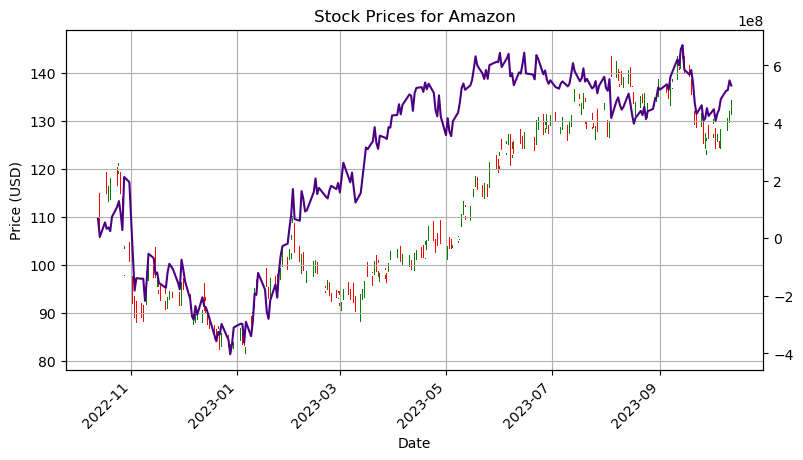

In [76]:
plotohlc(df, "Amazon")

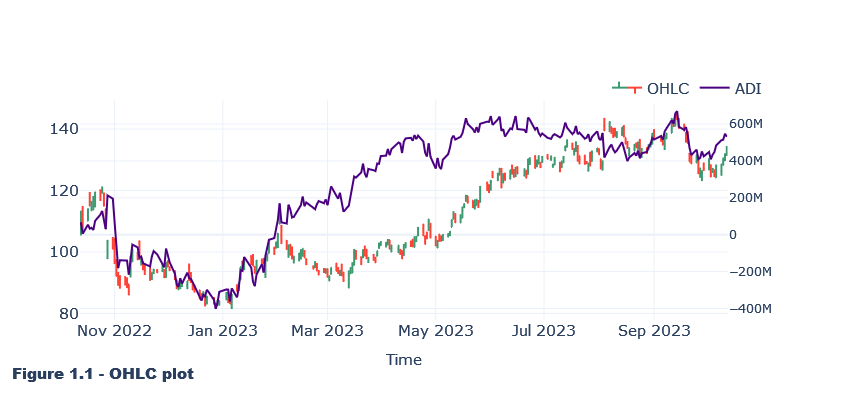

In [45]:
import plotly.graph_objects as go
# import make_subplots function from plotly.subplots
# to make grid of plots
from plotly.subplots import make_subplots
 
# use specs parameter in make_subplots function
# to create secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

n = 1

text = f"Figure 1.{n} - OHLC plot "

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# fig = go.Figure(data=go.Ohlc(x=df.index,
#                     open=df['Open'],
#                     high=df['High'],
#                     low=df['Low'],
#                     close=df['Close']))

fig.add_trace(go.Ohlc(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'], name="OHLC"))

fig.add_trace(go.Scatter(x=df.index, y=df.volume_adi,
    fill=None, name='ADI',
    mode='lines',
    line_color='indigo'), secondary_y=True)
fig = format_plot(fig, ylabel=" ", text=text)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()